# Ground Truth Generation Functions

This section is designed for the implementation of the functions meant to generate the ground-truth set of labels for the use of the synthetic data analysis (Stochastic Block Model) presented in the paper that I cover in the file 'Reproduce Figure 2'.

Author : Maxime Fontana

### Ground-Truth Properties

The ground-truth is problem dependent and must be considered every time we change the parameters h (number of unfair clusters) and k (number of fair clusters) in the Stochastic Block Model functions. We present below a sketch of what a ground truth for a fair clustering approach would be if h = 5 and k = 5.

<div>
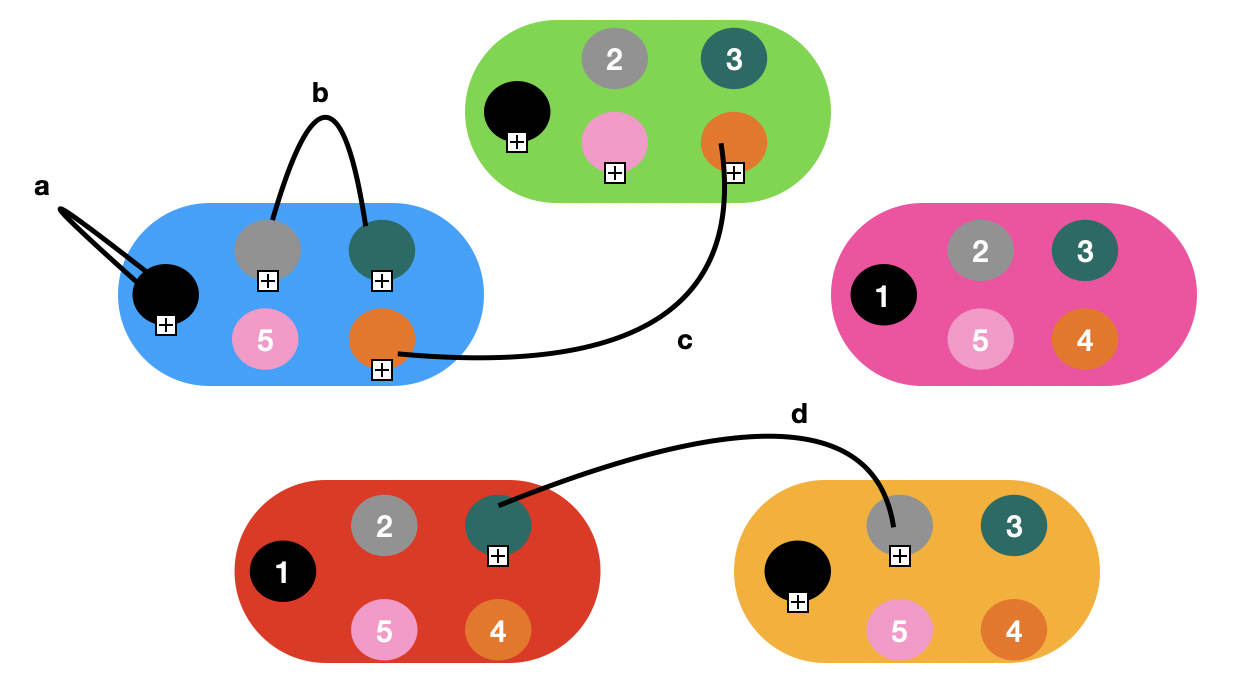
</div>

A small explanation is due here, the 5 outer circles represent the groups (h: Unfair Clusters), whereas the 5 inner circles represent the clusters (k : Fair Clusters). 
Also, the circles represent lists of labels, this sketch members of the same group as members of the same colour in a context of Stochastic Block Model generated dataset (with parameters a, b, c and d introduced in the paper, presented on this sketch)

In [6]:
# The functions to help us build a suitable ground-truth for the fair-clustering approach

# !!! REQUIRES OPTIMISATION FOR SCALABILITY

def merging(array, index):
    arr = []
    arr = np.append(arr, array[index])
    
    while index < 25:
        if index + 5 < 25:
            arr = np.append(arr, array[index+5])
            index += 5
        else :
            return arr
    
    return arr

def get_ground_truth(h, k, labels, group_ID):
    """
    Parameters
    ----------
    h : INTEGER
        NUMBER OF GROUPS.
    k : INTEGER
        NUMBER OF CLUSTERS.
    labels : TYPE
        UNFAIR CLUSTERING LABELS.
    group_ID : INTEGER
        GROUP TO RETURN (used for recursivity).
    Returns
    -------
    x : ARRAY
        GROUND-TRUTH SET REPRESENTING A FAIR CLUSTERING.
    """
    
    arr = []
    count = 0
    size = len(labels)
    for y in range(k):
        for i in range(k):
            arr.append(labels[count:size//(h*k)+count])
            count += size//(h*k)
    
    x = merging(arr, group_ID)
    
    return x